In [2]:
import pandas as pd
import numpy as np
import warnings
from qiskit import IBMQ
from qiskit import *
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import Aer, QuantumCircuit, execute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.utils import QuantumInstance
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from qiskit import IBMQ
import matplotlib.pyplot as plt
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345
print('complete')

complete


In [3]:
print(os.getcwd())

C:\Users\theda


In [4]:
data_full = pd.read_csv('crop yield data sheet - Copy.csv')
data = data_full.sample(frac=1.0)
        
print (len(data_full))
print (len(data))
data.head(6)

98
98


,1,2,3,4,5,6,7
0,1230,80,28,80,24,20,12
51,430,65,39,65,19,16,6
22,425,55,38,65,19,17,7
71,450,59,40,67,18,16,8
63,450,56,40,67,18,15,7
50,1225,79,24,79,22,19,11


In [5]:
data_array1 = np.array(data['1'])
data_array2 = np.array(data['2'])
data_array3 = np.array(data['3'])
data_array4 = np.array(data['4'])
data_array5 = np.array(data['5'])
data_array6 = np.array(data['6'])
data_array = np.vstack((data_array1, data_array2, data_array3, data_array4, data_array5, data_array6)).T
print(data_array)

[[1230   80   28   80   24   20]
 [ 430   65   39   65   19   16]
 [ 425   55   38   65   19   17]
 [ 450   59   40   67   18   16]
 [ 450   56   40   67   18   15]
 [1225   79   24   79   22   19]
 [ 400   52   38   64   19   15]
 [1250   70   24   70   22   18]
 [1250   75   29   78   22   19]
 [ 450   55   38   65   19   17]
 [1200   75   27   76   21   19]
 [ 440   58   37   66   22   18]
 [1300   80   28   80   24   20]
 [ 475   55   39   61   18   16]
 [ 500   70   34   74   22   16]
 [1245   78   27   78   22   19]
 [ 480   60   36   70   20   18]
 [ 450   65   35   70   19   18]
 [1250   80   26   78   23   19]
 [ 400   50   40   60   18   15]
 [ 450   50   37   65   18   19]
 [ 500   50   37   65   18   19]
 [1200   77   29   76   22   19]
 [ 450   50   37   60   18   15]
 [1150   78   29   77   21   18]
 [ 455   58   37   61   21   18]
 [ 445   60   38   68   22   18]
 [ 400   60   39   60   18   15]
 [ 475   65   38   60   20   16]
 [ 450   65   38   60   20   16]
 [1250   7

In [6]:
target_array = data["7"] 
print(target_array)
for i in range(len(target_array)):

    if ((target_array[i] > 5) and (target_array[i] < 8)):
        target_array[i] = 0

    if ((target_array[i] > 7) and (target_array[i] < 11)):
        target_array[i] = 1

    if ((target_array[i] > 10) and (target_array[i] < 13)):
        target_array[i] = 2
print(target_array)

0     12
51     6
22     7
71     8
63     7
      ..
41     7
11     8
72    11
87     8
17     7
Name: 7, Length: 98, dtype: int64
0     2
51    0
22    0
71    1
63    0
     ..
41    0
11    1
72    2
87    1
17    0
Name: 7, Length: 98, dtype: int64


In [7]:
features = data_array
labels = np.array(target_array)

In [8]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [9]:
feature_names = ['1', '2', '3', '4', '5', '6']
feature_names_array = np.array(feature_names)
print(feature_names_array)

['1' '2' '3' '4' '5' '6']


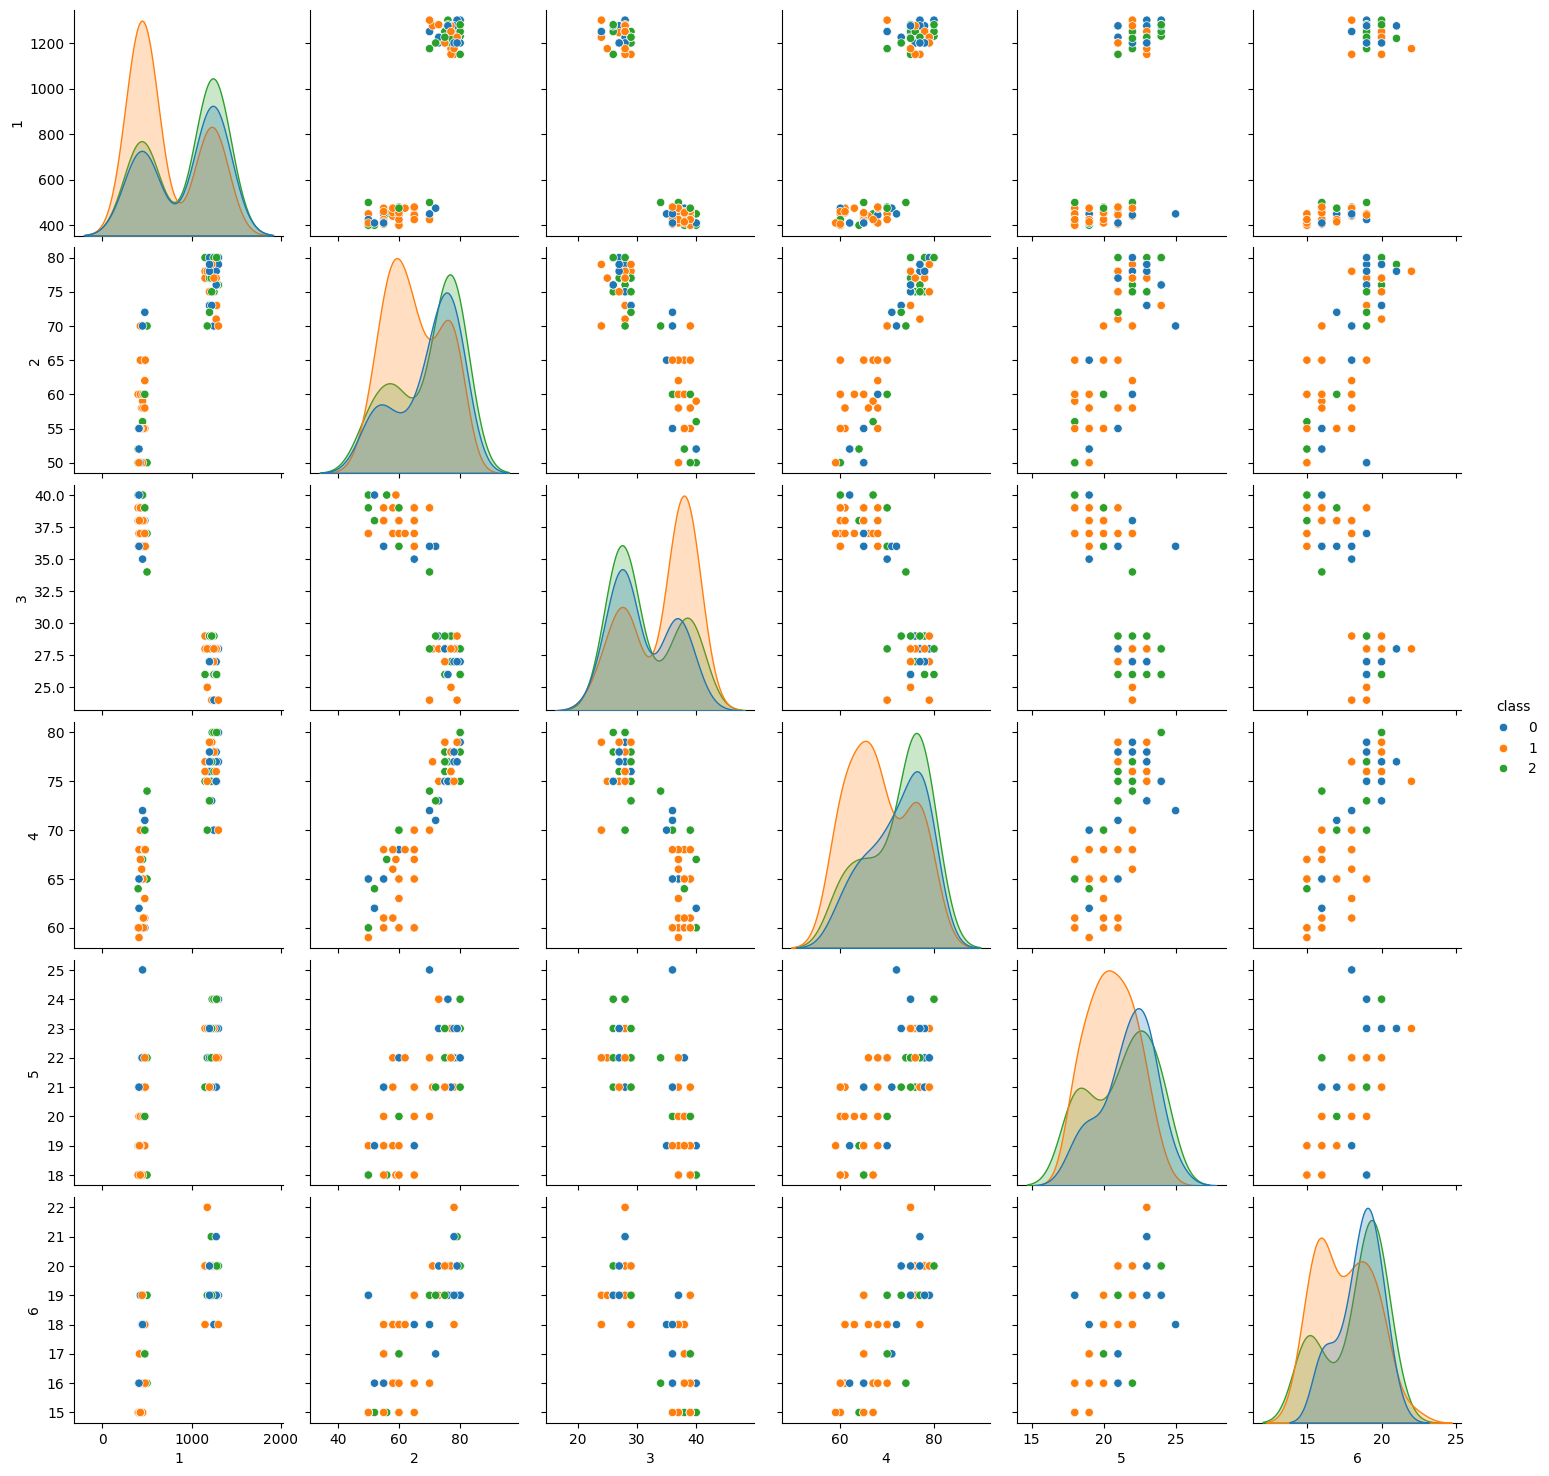

In [10]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data_array, columns=feature_names_array)
df["class"] = pd.Series(target_array)

sns.pairplot(df, hue="class", palette="tab10")

In [11]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)

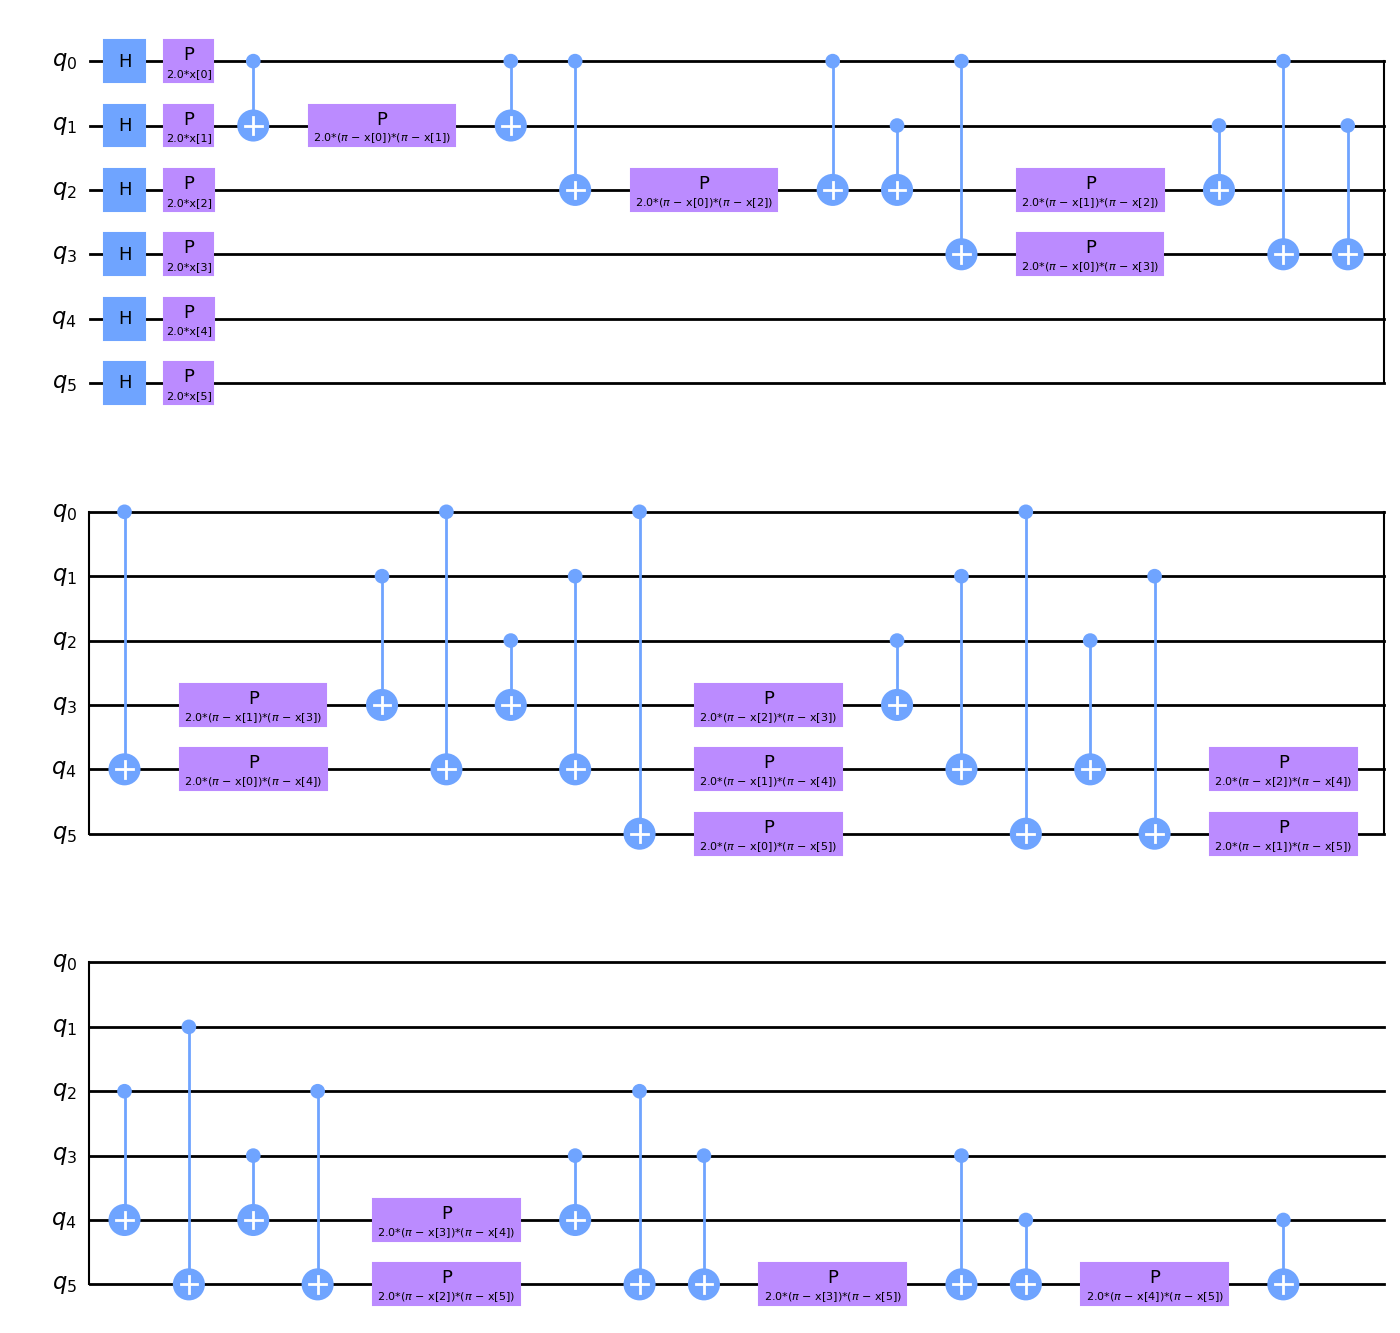

In [12]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

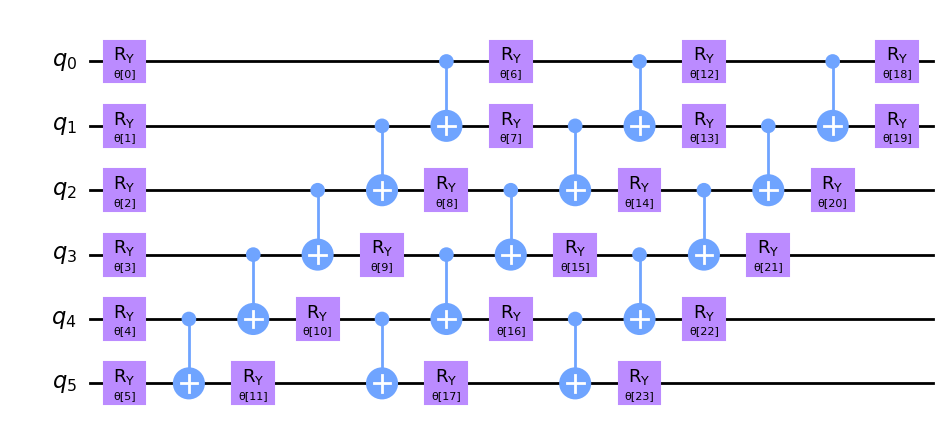

In [13]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [14]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=2000)

In [15]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [16]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

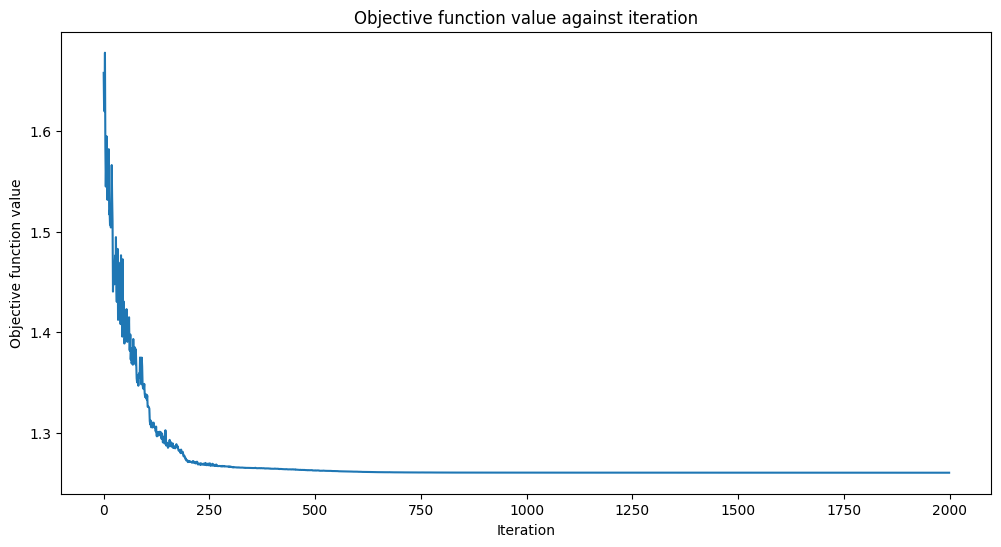

Training time: 2748 seconds


In [17]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
print(train_labels[:5])
print(train_features[:5])
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [19]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.76
Quantum VQC on the test dataset using RealAmplitudes:     0.60
